In [1]:
import os, dateutil, datetime
import scipy.io as sio
import deepdish as dp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
def flir_to_datetime(timestamp):
    ts = [int(x) for x in timestamp[:-1]]
    ts.append(int(timestamp[-1]*1e3))
    ts = np.array(ts)
    dt = datetime.datetime(ts[0], ts[1], ts[2], ts[3], ts[4], ts[5], ts[6])
    return dt

In [3]:
basepath = '/media/sanromd/data/lab/data/'
datapath = 'laser_experiments/heat_treatment/ah_001/thermal/processesed/'
filename = 'center.mat'

outpath  = 'laser_experiments/heat_treatment/ah_001/thermal/_analysis/'

filepath = os.path.join(basepath, datapath, filename)
savepath = os.path.join(basepath, outpath)

if not os.path.exists(savepath):
    os.mkdir(savepath)

In [4]:
data = sio.loadmat(filepath)

In [ ]:
# dp.io.save('./center.h5', data)

/sandbox/opt/share/anaconda/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


In [5]:
frames = [*data][3::2]
timestamps = [*data][4::2]

In [6]:
ts = [flir_to_datetime(data[ts][0]) for ts in timestamps]
ts = np.array(ts)

# reset ts (assume every experiment only mesure second and microseconds)
ts = ts-ts[0]

In [7]:
dt = [0]
for k in range(1,len(ts)):
    dt.append((ts[k] - ts[k-1]).total_seconds()*1e6)
dt = np.array(dt)

In [23]:
x = np.linspace(0,351,352)
y = np.linspace(0,159,160)
xx,yy = np.meshgrid(x,y)

## output frames for _surfer_

In [ ]:
for k, frame in enumerate(frames[0::620]):
    test_array = data[frame]
    df = pd.DataFrame({'x':np.ravel(xx), 'y':np.ravel(yy), 'Temperature':np.ravel(test_array)})
    df['Temperature'] = df.Temperature.apply(np.around,decimals = 0)
    savename   = 'temp_f'+str(k).zfill(4)+'.csv'
    savefile   = os.path.join(savepath, savename)
    df.to_csv(savefile, index = False)
    # np.savetxt(savefile, out_array.T, delimiter=',')

## analysis & plotting

In [465]:
test_array = data[frames[0]]
dy, dx = np.gradient(test_array)
dd = np.sqrt(dx**2 + dy**2)
qx = dx/dd
qy = dy/dd

/sandbox/opt/share/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/sandbox/opt/share/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [475]:
ndt = 100
test_array_tpdt = data[frames[ndt]]
dy_tpdt, dx_tpdt = np.gradient(test_array_tpdt)
dd_tpdt = np.sqrt(dx_tpdt**2 + dy_tpdt**2)
qx_tpdt = dx_tpdt/dd
qy_tpdt = dy_tpdt/dd

/sandbox/opt/share/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/sandbox/opt/share/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/sandbox/opt/share/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/sandbox/opt/share/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [476]:
dTdt = (test_array_tpdt - test_array)/(dt[ndt]/1e6)
dy_dTdt, dx_dTdt = np.gradient(dTdt)
dd_dTdt = np.sqrt(dx_dTdt**2 + dy_dTdt**2)
qx_dTdt = dx_dTdt/dd_dTdt
qy_dTdt = dy_dTdt/dd_dTdt

In [477]:
dydt = (dy_tpdt - dy)/(dt[ndt]/1e6)
dxdt = (dx_tpdt - dx)/(dt[ndt]/1e6)
dddt = np.sqrt(dxdt**2 + dydt**2)

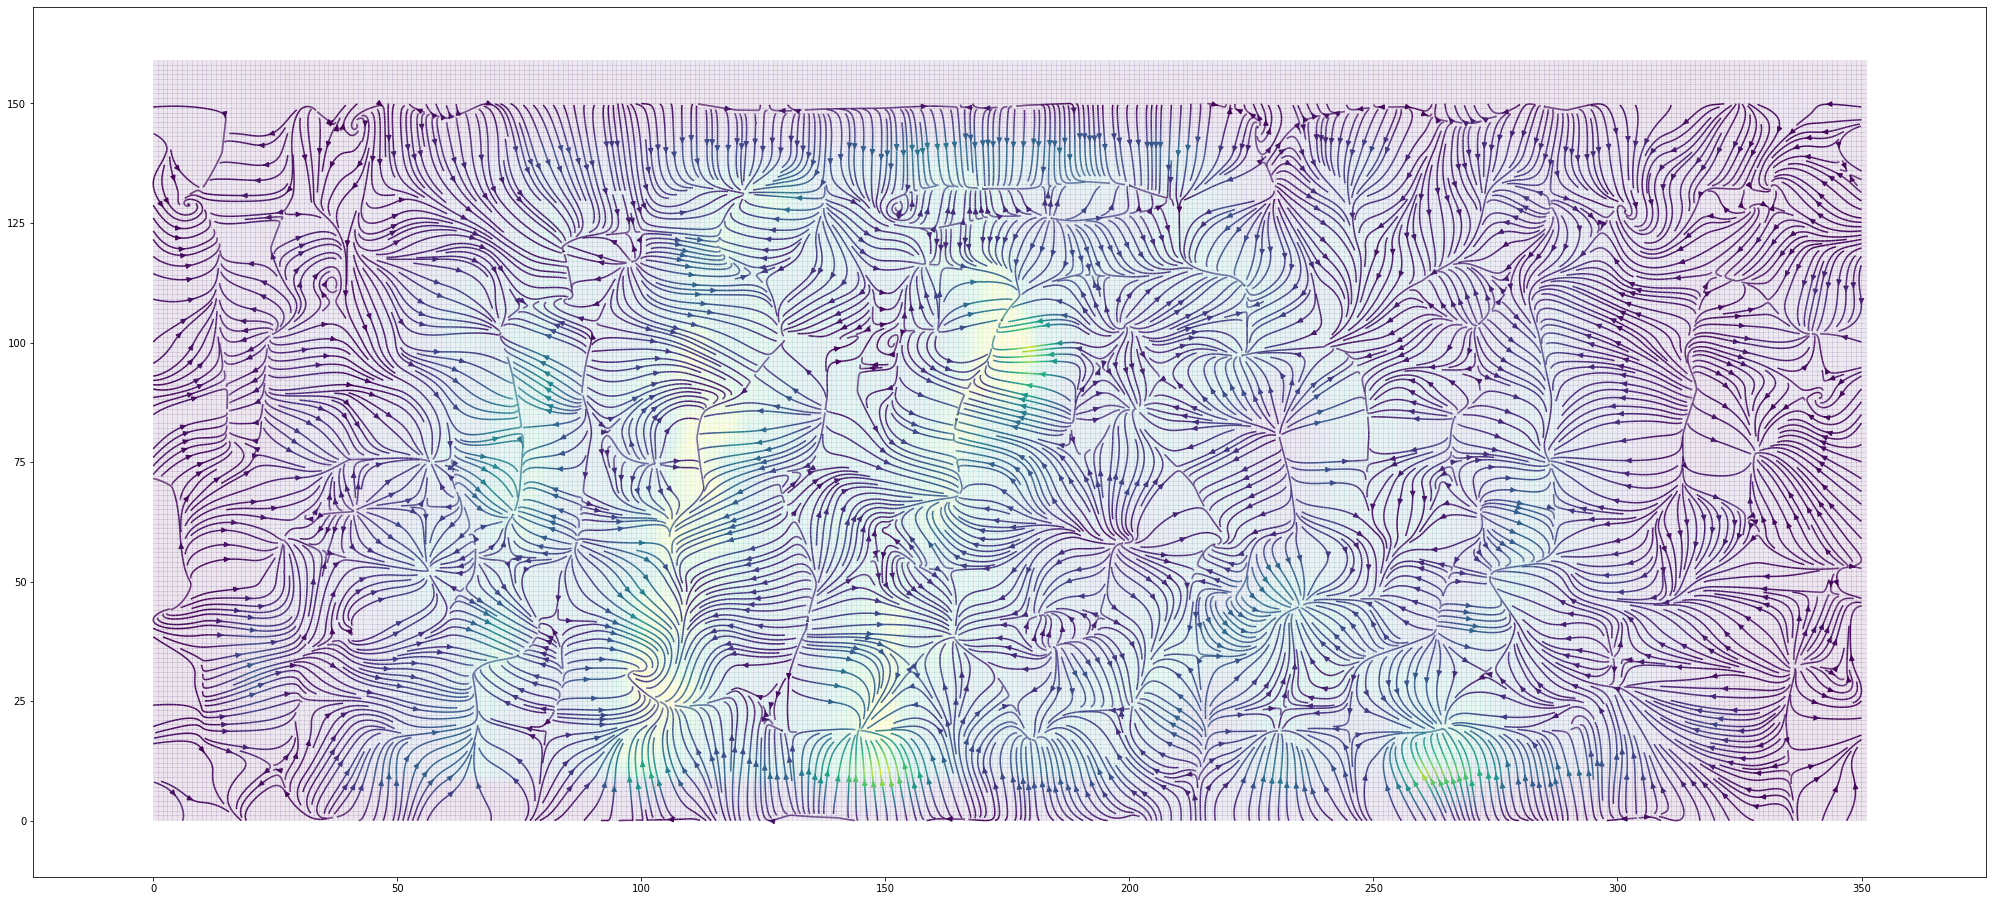

In [479]:
ndx = 5
ndy = 10

fig, ax = plt.subplots(figsize = (35,16))
# Enforce the margins, and enlarge them to give room for the vectors.
ax.use_sticky_edges = False
ax.margins(0.07)
ax.pcolor(xx,yy,dTdt,alpha=0.1)
# ax.quiver(xx[::ndx,::ndy],yy[::ndx,::ndy],qx_dTdt[::ndx,::ndy], qy_dTdt[::ndx,::ndy], 
#           dd_dTdt[::ndx,::ndy],
#           scale=0.2,
#           width=0.5,
#           units='xy')
ax.streamplot(xx[::nd,::nd],yy[::nd,::nd],dx_dTdt[::nd,::nd], dy_dTdt[::nd,::nd], density=(12,6),
             color=dd_dTdt[::nd,::nd])
plt.show()

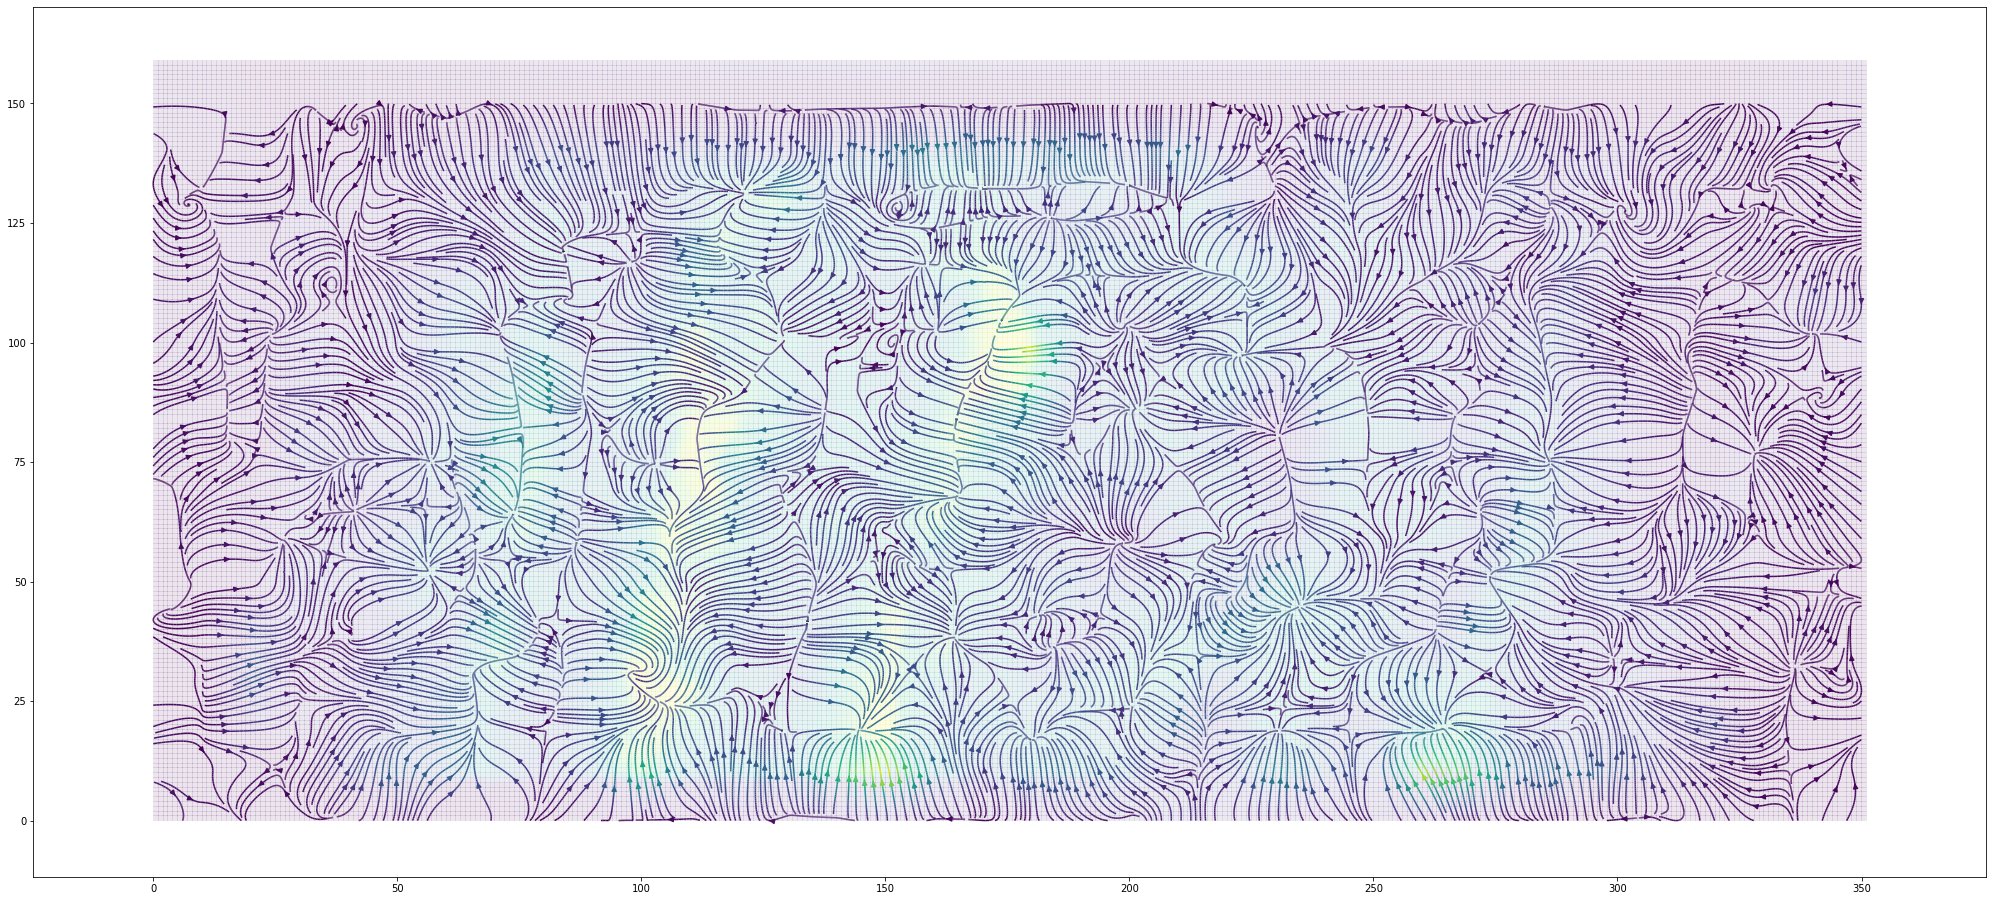

In [478]:
ndx = 5
ndy = 10

fig, ax = plt.subplots(figsize = (35,16))
# Enforce the margins, and enlarge them to give room for the vectors.
ax.use_sticky_edges = False
ax.margins(0.07)
ax.pcolor(xx,yy,dTdt,alpha=0.1)
# ax.quiver(xx[::ndx,::ndy],yy[::ndx,::ndy],qx_dTdt[::ndx,::ndy], qy_dTdt[::ndx,::ndy], 
#           dd_dTdt[::ndx,::ndy],
#           scale=0.2,
#           width=0.5,
#           units='xy')
ax.streamplot(xx[::nd,::nd],yy[::nd,::nd],dxdt[::nd,::nd], dydt[::nd,::nd], density=(12,6),
             color=dddt[::nd,::nd])
plt.show()

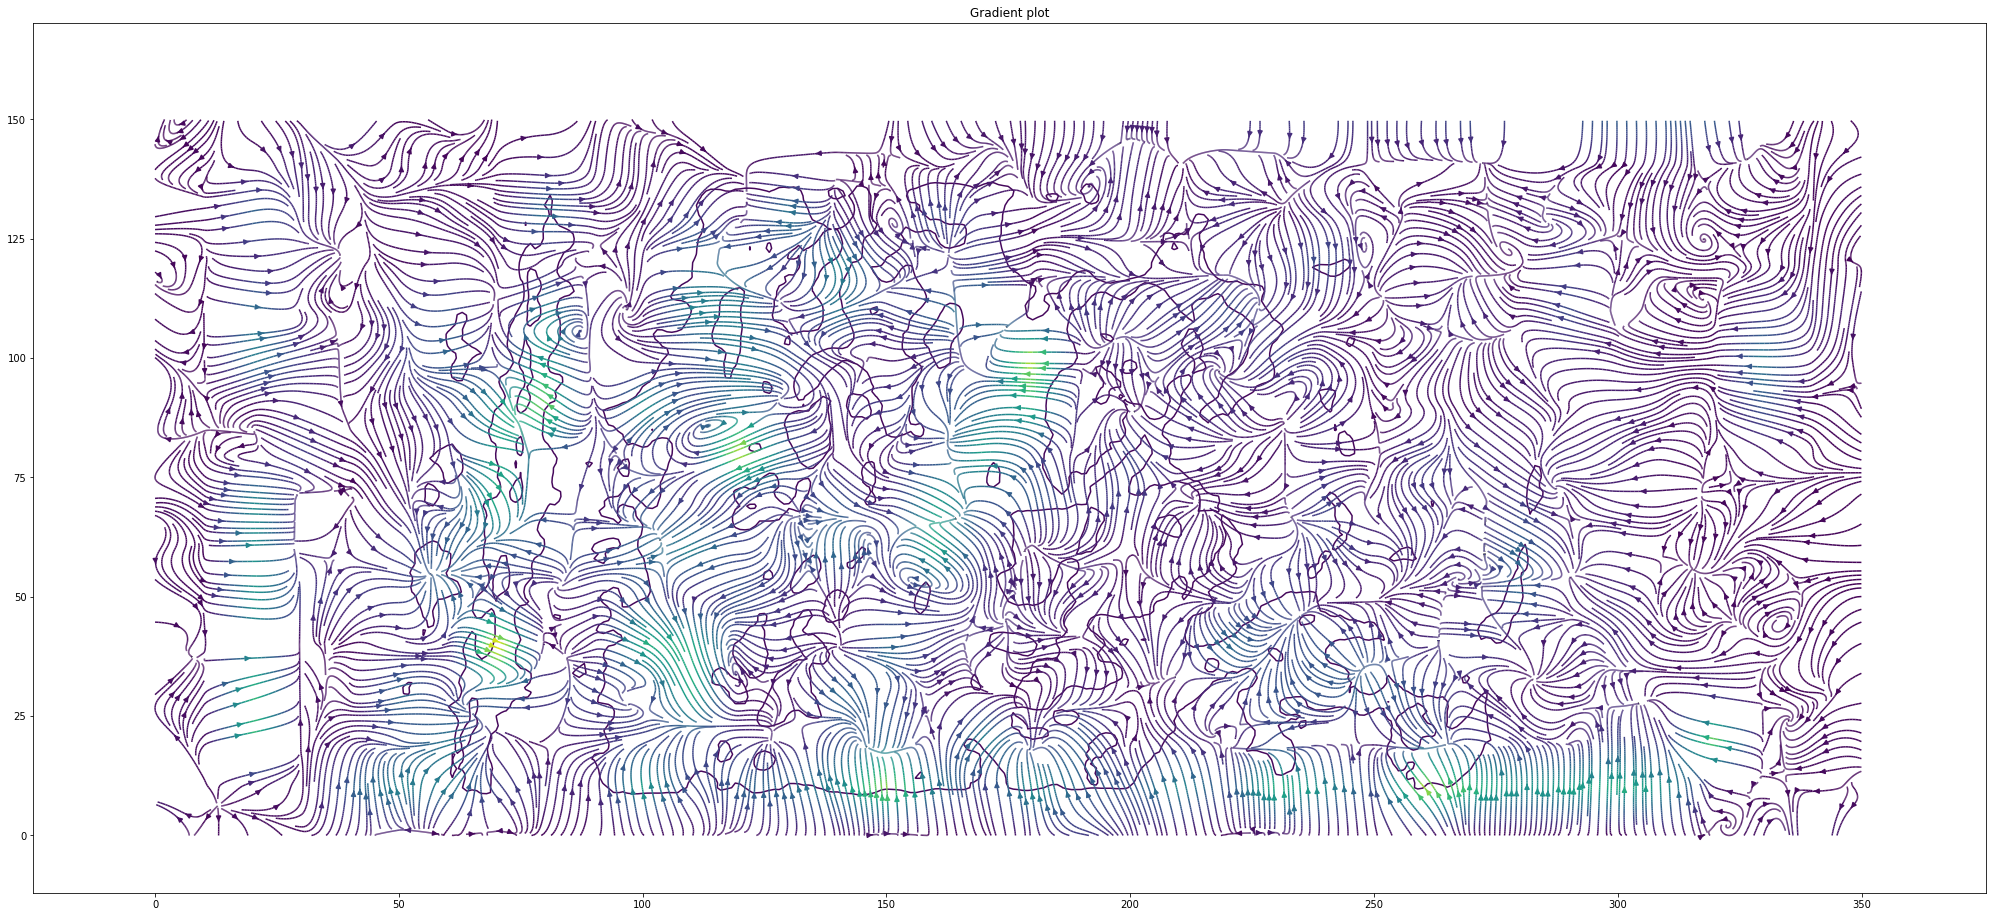

In [408]:
nd = 10
cmap = cm.get_cmap(name='hot', lut=None)

fig, ax = plt.subplots(figsize = (35,16))
# Enforce the margins, and enlarge them to give room for the vectors.
ax.use_sticky_edges = False
ax.margins(0.07)
#ax.pcolor(xx,yy,test_array,alpha=0.5)
ax.contour(xx,yy,test_array, levels = np.linspace(25,350,50))
ax.streamplot(xx[::nd,::nd],yy[::nd,::nd],dx[::nd,::nd], dy[::nd,::nd], density=(12,6),
             color=dd[::nd,::nd])
# ax.quiver(xx[::nd,::nd],yy[::nd,::nd],qx[::nd,::nd], qy[::nd,::nd], 
#           dd[::nd,::nd],
#           scale=0.1,
#           width=1,
#           units='xy')

ax.set_title('Gradient plot')
plt.show()

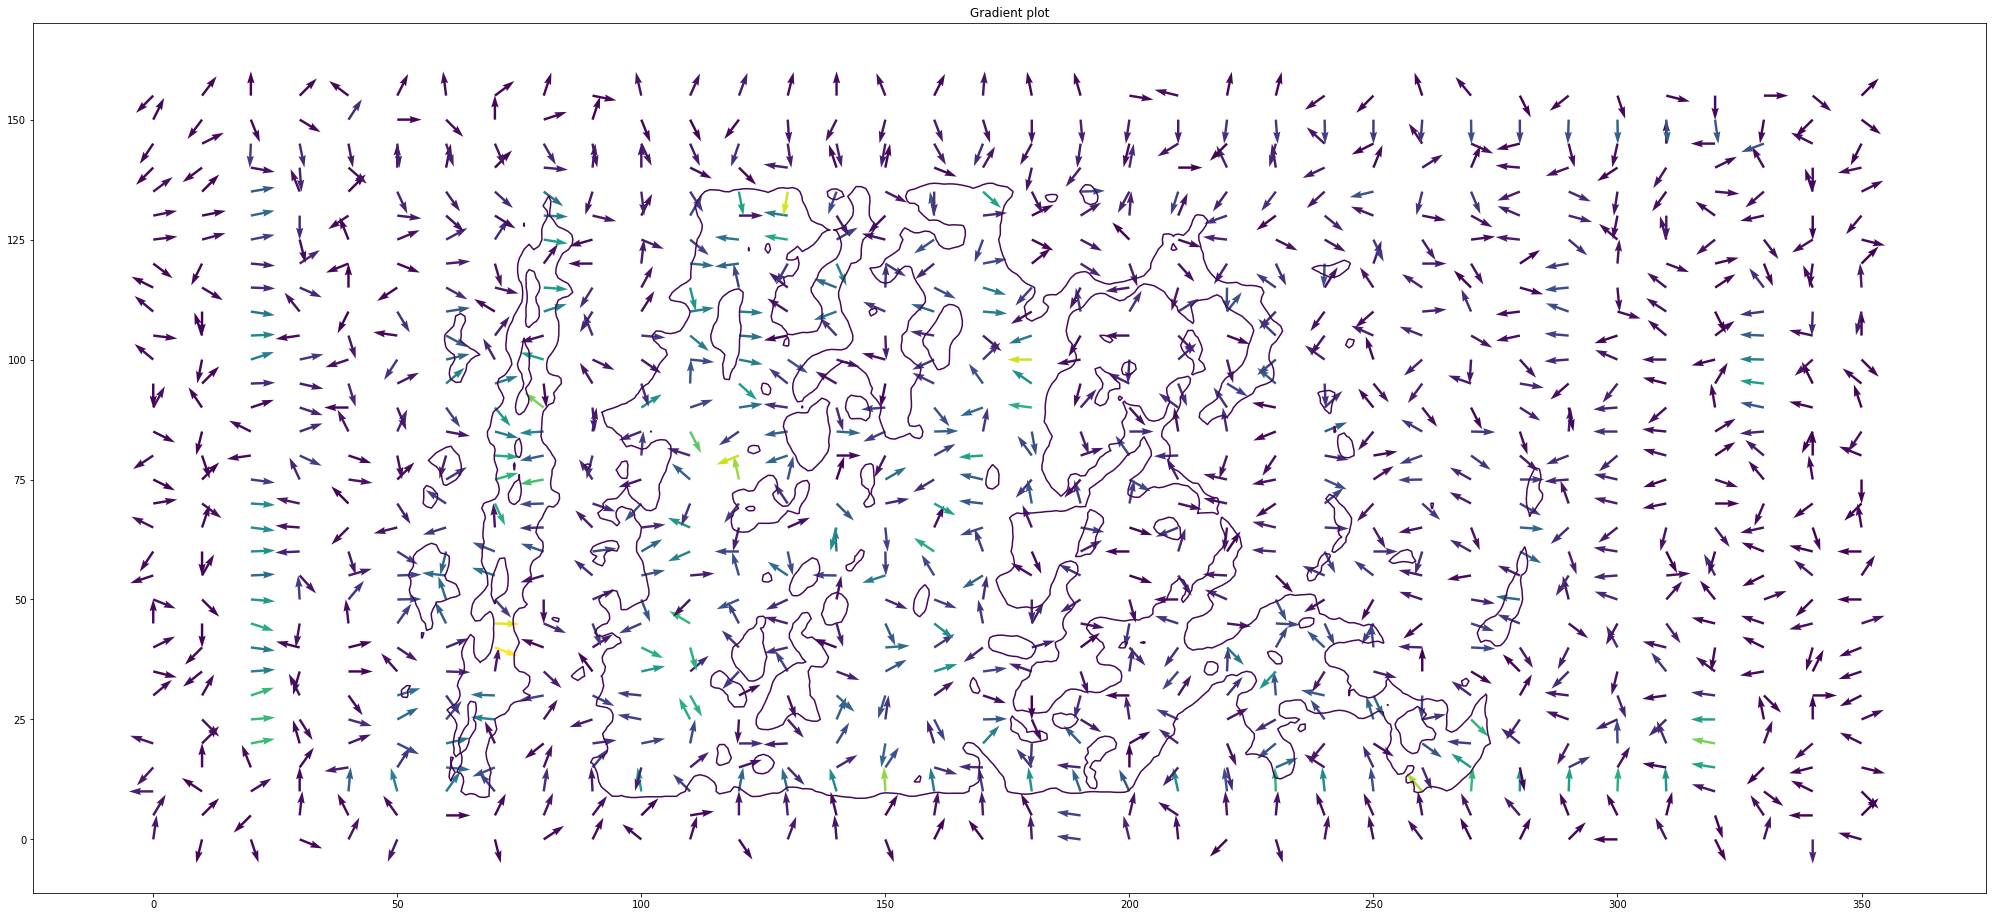

In [425]:
ndx = 5
ndy = 10
#ndx = ndy =10

cmap = cm.get_cmap(name='hot', lut=None)

fig, ax = plt.subplots(figsize = (35,16))
# Enforce the margins, and enlarge them to give room for the vectors.
ax.use_sticky_edges = False
ax.margins(0.07)
#ax.pcolor(xx,yy,test_array,alpha=0.5)
ax.contour(xx,yy,test_array, levels = np.linspace(25,350,50))
# ax.streamplot(xx[::nd,::nd],yy[::nd,::nd],qx[::nd,::nd], qy[::nd,::nd], density=(3,1),
#              color=dd[::nd,::nd])
ax.quiver(xx[::ndx,::ndy],yy[::ndx,::ndy],qx[::ndx,::ndy], qy[::ndx,::ndy], 
          dd[::ndx,::ndy],
          scale=0.2,
          width=0.5,
          units='xy')

ax.set_title('Gradient plot')
plt.show()